# Задача 1. Минимизация гладкой функции

## 1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [1]:
from math import sin, exp

def func(x):
    return sin(x / 5.) * exp(x / 10.) + 5. * exp(-x/ 2.)

In [2]:
import numpy as np

xArr = np.arange(1., 31.)
print(xArr)
print("Shape x:", xArr.shape)
yArr = np.array([func(x) for x in xArr])
print(yArr)
print("Shape y:", yArr.shape)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Shape x: (30,)
[  3.25221687   2.31503384   1.87783842   1.74684595   1.7977761
   1.94722128   2.13543898   2.31617016   2.45082365   2.50541641
   2.44929128   2.2550105    1.89904466   1.36300335   0.63522142
  -0.28745171  -1.39780121  -2.67647563  -4.09044301  -5.59182909
  -7.11729817  -8.58813805  -9.91120472 -10.98086747 -11.68207055
 -11.89459075 -11.49852141 -10.38095272  -8.44374503  -5.61220878]
Shape y: (30,)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

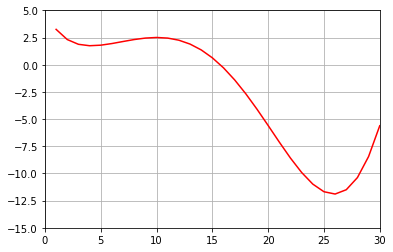

In [18]:
plt.plot(xArr, yArr, 'r-')
plt.grid(True)
plt.axis([0, 30, -15, 5])
plt.show()

## 2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
## 3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
## 4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
## 5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [5]:
from scipy.optimize import minimize

min_func_val = minimize(func, 5)
print("Minimized f(x) (standard method): ", np.round(min_func_val.fun, 3), "for x = ", np.round(min_func_val.x, 3))
print("Number of iterations: ", min_func_val.nit)

Minimized f(x) (standard method):  1.745 for x =  [4.136]
Number of iterations:  6


## 6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [6]:
min_func_val2 = minimize(func, 2, method = 'BFGS')
print("Minimized f(x) (BFGS method): ", np.round(min_func_val2.fun, 3), "for x = ", np.round(min_func_val2.x, 3))
print("Number of iterations: ", min_func_val2.nit)

min_val_answer1 = np.zeros( (2) )
min_val_answer1[0] = round(min_func_val2.fun, 2)
print(min_val_answer1)

Minimized f(x) (BFGS method):  1.745 for x =  [4.136]
Number of iterations:  6
[1.75 0.  ]


## 7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [7]:
min_func_val3 = minimize(func, 30, method = 'BFGS')
print("Minimized f(x) (BFGS method): ", np.round(min_func_val3.fun, 3), "for x = ", np.round(min_func_val3.x, 3))
print("Number of iterations: ", min_func_val2.nit)

min_val_answer1[1] = round(min_func_val3.fun, 2)
print(min_val_answer1)

Minimized f(x) (BFGS method):  -11.899 for x =  [25.88]
Number of iterations:  6
[  1.75 -11.9 ]


## 8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [8]:
print(min_val_answer1)

with open("answer_1.txt", "w") as f_answer:
    for item in min_val_answer1:
        f_answer.write(str(item) + ' ')

[  1.75 -11.9 ]


# Задача 2. Глобальная оптимизация

## 1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
## 2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
## 3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
## 4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
## 5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
## 6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [9]:
from scipy.optimize import differential_evolution

bounds = [(1, 30)]
min_func_val4 = differential_evolution(func, bounds)
print("Minimized f(x) (differential evolution): ", np.round(min_func_val4.fun, 3), "for x = ", np.round(min_func_val4.x, 3))
print("Number of iterations: ", min_func_val4.nit)

Minimized f(x) (differential evolution):  -11.899 for x =  [25.88]
Number of iterations:  4


In [10]:
with open("answer_2.txt", "w") as f_answer:
    f_answer.write(str(round(min_func_val4.fun, 2)))

# Задача 3. Минимизация негладкой функции

## 1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
## 2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

In [11]:
def func2(x):
    return int(func(x))

xArr2 = np.arange(1., 31., 0.01)
print(xArr2)
print("Shape x:", xArr2.shape)
yArr2 = np.array([func2(x) for x in xArr2])
print(yArr2)
print("Shape y:", yArr2.shape)

[ 1.    1.01  1.02 ... 30.97 30.98 30.99]
Shape x: (3000,)
[ 3  3  3 ... -1 -1 -1]
Shape y: (3000,)


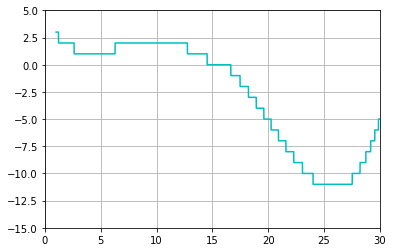

In [12]:
plt.plot(xArr2, yArr2, 'c-')
plt.grid(True)
plt.axis([0, 30, -15, 5])
plt.show()

## 3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [13]:
min_func2_val1 = minimize(func2, 30, method = 'BFGS')
print("Minimized f(x) (BFGS method): ", np.round(min_func2_val1.fun, 3), "for x = ", np.round(min_func2_val1.x, 3))
print("Number of iterations: ", min_func2_val1.nit)

min_val_answer2 = np.zeros( (2) )
min_val_answer2[0] = round(min_func2_val1.fun, 2)
print(min_val_answer2)

Minimized f(x) (BFGS method):  -5 for x =  [30.]
Number of iterations:  0
[-5.  0.]


## 4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
## 5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
## 6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [14]:
min_func2_val2 = differential_evolution(func2, bounds)
print("Minimized f(x) (BFGS method): ", np.round(min_func2_val2.fun, 3), "for x = ", np.round(min_func2_val2.x, 3))
print("Number of iterations: ", min_func2_val2.nit)

min_val_answer2[1] = round(min_func2_val2.fun, 2)
print(min_val_answer2)

Minimized f(x) (BFGS method):  -11.0 for x =  [25.143]
Number of iterations:  4
[ -5. -11.]


In [15]:
with open("answer_3.txt", "w") as f_answer:
    for item in min_val_answer2:
        f_answer.write(str(item) + ' ')